In [34]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

Vamos carregar o dataset

In [35]:
X, y = datasets.load_breast_cancer(return_X_y = True)

In [36]:
data = datasets.load_breast_cancer()

Separando em 80% para treino e 20% para teste

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

Escalonando os dados

In [38]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Variando os hiperparâmetros utilizando GridSearchCV para RandomForestClassifier

In [39]:
parameters = {'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 7]}
rf = RandomForestClassifier(random_state = 10)
clf = GridSearchCV(rf, parameters, cv = 5)
clf.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=10),
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]})

Melhor score

In [40]:
clf.best_score_

0.9604395604395606

Melhor hiperparâmetros

In [41]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 100}

Variando os hiperparâmetros utilizando GridSearchCV para AdaBoostClassifier

In [42]:
parameters2 = {'learning_rate': [0.1, 0.05, 0.01 ,0.5], 'n_estimators': [50, 100, 200]}
ab = AdaBoostClassifier(random_state = 10)
clf2 = GridSearchCV(ab, parameters2, cv= 5)
clf2.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=10),
             param_grid={'learning_rate': [0.1, 0.05, 0.01, 0.5],
                         'n_estimators': [50, 100, 200]})

Melhor score

In [43]:
clf2.best_score_

0.9736263736263737

Melhor hiperparâmetros

In [44]:
clf2.best_params_

{'learning_rate': 0.1, 'n_estimators': 200}

Retreinando o melhor modelo do algoritmo RandomForestClassifier e obtendo o classification report

In [45]:
rf = RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state = 10)
rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [46]:
y_pred_rf = rf.predict(X_test_scaled)

Como podemos perceber, a métrica mais baixa é o recall da classe 0 que é 0.93

Isso significa que para as amostras que contêm câncer de mama maligno, o modelo tende a dizer que elas contêm câncer de mama benigno com uma frequência um pouco mais alta. Provavelmente, por conta da classe 1 ter mais amostras.

Além disso, como a classe 1 tem mais amostras e possui melhor precisão e recall, provavelmente por possuir mais amostras, a média das métricas com pesos é melhor do que a média normal das métricas.

In [47]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94        42
           1       0.96      0.97      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Retreinando o melhor modelo do algoritmo AdaBoostClassifier e obtendo o classification report

In [48]:
ab = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 200, random_state = 10)
ab.fit(X_train_scaled, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=10)

In [49]:
y_pred_ab = ab.predict(X_test_scaled)

Como podemos perceber, a métrica mais baixa é o recall da classe 0 que é 0.9

Isso significa que para as amostras que contêm câncer de mama maligno, o modelo tende a dizer que elas contêm câncer de mama benigno com uma frequência um pouco mais alta. Provavelmente, por conta da classe 1 ter mais amostras.

Além disso, a precisão da classe 0 é maior do que a precisão da classe 1, o que significa que quando o modelo prediz a classe 0 ele tende a estar mais certo do que quando ele prediz a classe 1.

In [50]:
print(classification_report(y_test, y_pred_ab))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Obtendo a importância das features para o modelo obtido a partir do RandomForestClassifier

In [51]:
feature_importances = rf.feature_importances_
feature_importances

array([0.04803925, 0.01367705, 0.03883932, 0.04118291, 0.00697572,
       0.01283791, 0.03647769, 0.08388728, 0.00408871, 0.00442376,
       0.00626803, 0.00514645, 0.02557909, 0.02525511, 0.00408193,
       0.00355174, 0.00648875, 0.00702753, 0.00294852, 0.00603027,
       0.13286693, 0.01824856, 0.10863114, 0.14100555, 0.0117168 ,
       0.01816064, 0.02186333, 0.14491316, 0.01214363, 0.00764325])

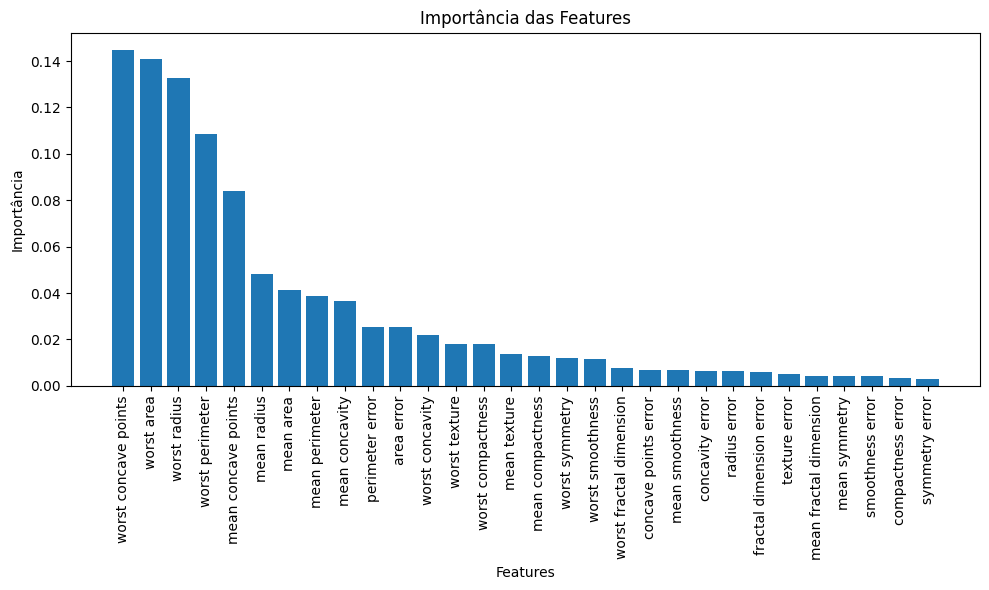

In [52]:
import matplotlib.pyplot as plt

# Ordenando as feature_importances em ordem decrescente
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = data.feature_names[sorted_indices]

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Importância das Features')
plt.tight_layout()
plt.show()

In [53]:
feature_importances = ab.feature_importances_
feature_importances

array([0.   , 0.07 , 0.   , 0.04 , 0.095, 0.05 , 0.01 , 0.02 , 0.   ,
       0.   , 0.03 , 0.   , 0.   , 0.09 , 0.02 , 0.05 , 0.   , 0.   ,
       0.   , 0.   , 0.02 , 0.13 , 0.07 , 0.075, 0.085, 0.01 , 0.02 ,
       0.085, 0.03 , 0.   ])

Obtendo a importância das features para o modelo obtido a partir do AdaBoostClassifier

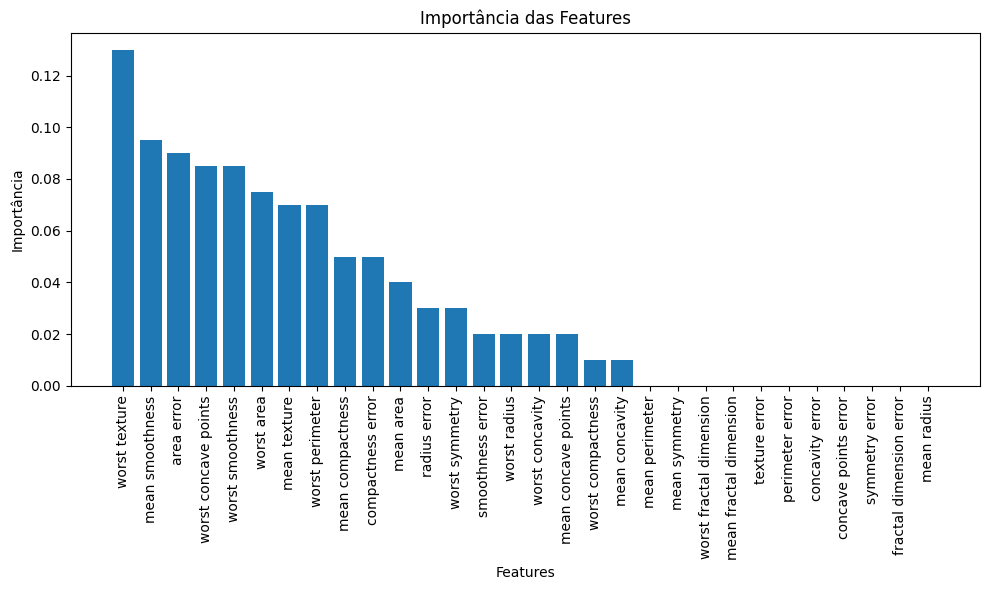

In [54]:
import matplotlib.pyplot as plt

# Ordenando as feature_importances em ordem decrescente
sorted_indices = feature_importances.argsort()[::-1]
sorted_feature_importances = feature_importances[sorted_indices]
sorted_feature_names = data.feature_names[sorted_indices]

# Criando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(range(len(sorted_feature_importances)), sorted_feature_importances, align='center')
plt.xticks(range(len(sorted_feature_importances)), sorted_feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importância')
plt.title('Importância das Features')
plt.tight_layout()
plt.show()

Retreinando apenas com as 10 features mais importantes para o RandomForestClassifier

In [55]:
feature_importances = rf.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
X_train_top_features = X_train_scaled[:, sorted_indices[:10]]
X_test_top_features = X_test_scaled[:, sorted_indices[:10]]

In [56]:
rf = RandomForestClassifier(max_depth = 5, n_estimators = 100, random_state = 10)
rf.fit(X_train_top_features, y_train)

RandomForestClassifier(max_depth=5, random_state=10)

In [57]:
y_pred_rf = rf.predict(X_test_top_features)

Podemos perceber que o recall da classe 0 melhorou usando apenas os atributos mais importantes, indo de 0.93 para 0.95, o que significa que o modelo está identificando melhor as amostras que possuem câncer maligno, mesmo que elas constituam minoria.

A precisão da classe 0 diminuiu, indo de 0.95 para 0.93, o que significa que quando o modelo prediz que uma amostra possui câncer maligno, ele tende a estar um pouco mais errado do que antes.

Quanto ao resto das métricas, o desempenho foi muito semelhante.

In [58]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94        42
           1       0.97      0.96      0.97        72

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



Retreinando apenas com as 10 features mais importantes para o AdaBoostClassifier

In [59]:
feature_importances = ab.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
X_train_top_features = X_train_scaled[:, sorted_indices[:10]]
X_test_top_features = X_test_scaled[:, sorted_indices[:10]]

In [60]:
ab = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 200, random_state = 10)
ab.fit(X_train_top_features, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=10)

In [61]:
y_pred_ab = ab.predict(X_test_top_features)

Podemos perceber que as métricas continuaram exatamente as mesmas, provavelmente porque os modelos mais fortes apenas precisam das features mais importantes

In [62]:
print(classification_report(y_test, y_pred_ab))

              precision    recall  f1-score   support

           0       0.97      0.90      0.94        42
           1       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

